In [1]:
import build123d as bd
import stellarmesh as sm
from IPython.display import Image
import logging
import tempfile

/home/alex/micromamba/envs/stellarmesh/lib/python3.12/site-packages/pymoab/__init__.py:21: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [2]:
logging.basicConfig()
logging.getLogger("stellarmesh").setLevel(logging.INFO)
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)

In [3]:
def render_mesh(mesh: sm.Mesh):
    with tempfile.NamedTemporaryFile(suffix=".png", delete=False) as tmp_file:
        mesh.render(tmp_file.name, rotation_xyz=(90, 0, -90), normals=0, clipping=True)
        display(Image(tmp_file.name, width=800))

# Model torus geometry

In [4]:
def build_torus_geometry():
    solids = [bd.Solid.make_torus(10, 1)]
    for _ in range(2):
        solids.append(bd.thicken(solids[-1].faces()[0], 1))
    solids = solids[1:]
    return sm.Geometry(solids, material_names=["a", "b"])

# Mesh with OCC

INFO:stellarmesh.geometry:Importing 2 solids to geometry


X_ChangeProperty: BadValue (integer parameter out of range for operation) 0x0


1e-07
Info    : Writing '/tmp/tmpz8hvsd99.msh'...
Info    : Done writing '/tmp/tmpz8hvsd99.msh'
Info    : Reading '/tmp/tmpz8hvsd99.msh'...
Info    : 14 entities
Info    : 588 nodes
Info    : 1014 elements
Info    : Done reading '/tmp/tmpz8hvsd99.msh'
-------------------------------------------------------
Version       : 4.13.1
License       : GNU General Public License
Build OS      : Linux64-sdk
Build date    : 20241016
Build host    : 2976249cf102
Build options : 64Bit ALGLIB[contrib] ANN[contrib] Bamg Blossom Cairo DIntegration Dlopen DomHex Eigen[contrib] Fltk GMP Gmm[contrib] Hxt Jpeg Kbipack LinuxJoystick MathEx[contrib] Mesh Metis[contrib] Mpeg Netgen Nii2mesh ONELAB ONELABMetamodel OpenCASCADE OpenCASCADE-CAF OpenGL OpenMP OptHom Parser Plugins Png Post QuadMeshingTools QuadTri Solver TetGen/BR TinyXML2[contrib] Untangle Voro++[contrib] WinslowUntangler Zlib
FLTK version  : 1.3.9
OCC version   : 7.8.1
Packaged by   : conda
Web site      : https://gmsh.info
Issue tracker : htt

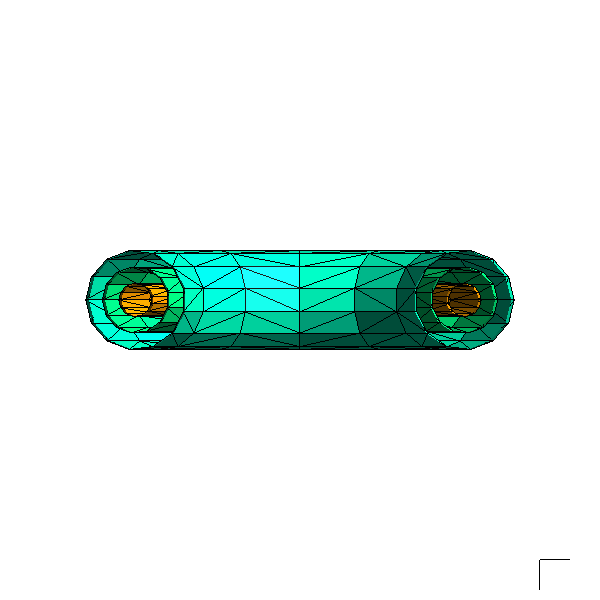

In [5]:
geometry = build_torus_geometry()
meshing_options = sm.OCCSurfaceOptions(tol_angular_deg=1, tol_linear=None)
mesh = sm.SurfaceMesh.from_geometry(geometry, meshing_options)
render_mesh(mesh)

INFO:stellarmesh.geometry:Importing 2 solids to geometry


X_ChangeProperty: BadValue (integer parameter out of range for operation) 0x0


1e-07
Info    : Writing '/tmp/tmpw9_xyy1e.msh'...
Info    : Done writing '/tmp/tmpw9_xyy1e.msh'
Info    : Reading '/tmp/tmpw9_xyy1e.msh'...
Info    : 14 entities
Info    : 2187 nodes
Info    : 4056 elements
Info    : Done reading '/tmp/tmpw9_xyy1e.msh'
-------------------------------------------------------
Version       : 4.13.1
License       : GNU General Public License
Build OS      : Linux64-sdk
Build date    : 20241016
Build host    : 2976249cf102
Build options : 64Bit ALGLIB[contrib] ANN[contrib] Bamg Blossom Cairo DIntegration Dlopen DomHex Eigen[contrib] Fltk GMP Gmm[contrib] Hxt Jpeg Kbipack LinuxJoystick MathEx[contrib] Mesh Metis[contrib] Mpeg Netgen Nii2mesh ONELAB ONELABMetamodel OpenCASCADE OpenCASCADE-CAF OpenGL OpenMP OptHom Parser Plugins Png Post QuadMeshingTools QuadTri Solver TetGen/BR TinyXML2[contrib] Untangle Voro++[contrib] WinslowUntangler Zlib
FLTK version  : 1.3.9
OCC version   : 7.8.1
Packaged by   : conda
Web site      : https://gmsh.info
Issue tracker : ht

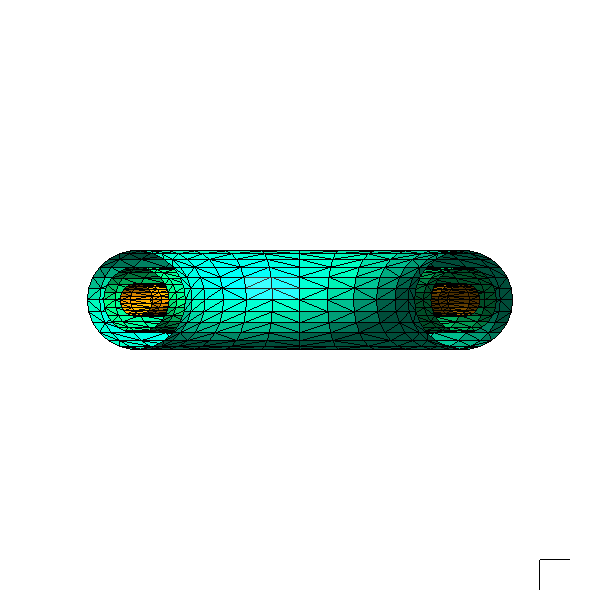

In [6]:
geometry = build_torus_geometry()
meshing_options = sm.OCCSurfaceOptions(tol_angular_deg=0.5, tol_linear=None)
mesh = sm.SurfaceMesh.from_geometry(geometry, meshing_options)
render_mesh(mesh)

## Linear tolerance

INFO:stellarmesh.geometry:Importing 2 solids to geometry


1e-07
Info    : Writing '/tmp/tmpvzfqgo6y.msh'...
Info    : Done writing '/tmp/tmpvzfqgo6y.msh'
Info    : Reading '/tmp/tmpvzfqgo6y.msh'...
Info    : 14 entities
Info    : 3169 nodes
Info    : 5918 elements
Info    : Done reading '/tmp/tmpvzfqgo6y.msh'
-------------------------------------------------------
Version       : 4.13.1
License       : GNU General Public License
Build OS      : Linux64-sdk
Build date    : 20241016
Build host    : 2976249cf102
Build options : 64Bit ALGLIB[contrib] ANN[contrib] Bamg Blossom Cairo DIntegration Dlopen DomHex Eigen[contrib] Fltk GMP Gmm[contrib] Hxt Jpeg Kbipack LinuxJoystick MathEx[contrib] Mesh Metis[contrib] Mpeg Netgen Nii2mesh ONELAB ONELABMetamodel OpenCASCADE OpenCASCADE-CAF OpenGL OpenMP OptHom Parser Plugins Png Post QuadMeshingTools QuadTri Solver TetGen/BR TinyXML2[contrib] Untangle Voro++[contrib] WinslowUntangler Zlib
FLTK version  : 1.3.9
OCC version   : 7.8.1
Packaged by   : conda
Web site      : https://gmsh.info
Issue tracker : ht

X_ChangeProperty: BadValue (integer parameter out of range for operation) 0x0


Info    : Done writing '/tmp/tmpa6_xatys.png'


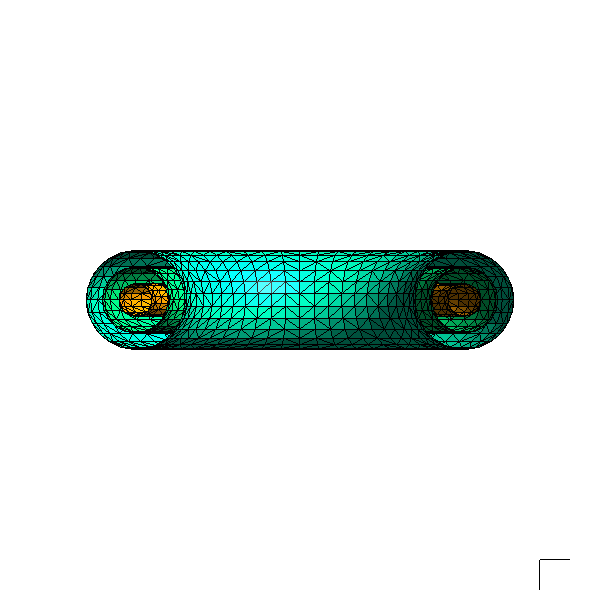

In [7]:
geometry = build_torus_geometry()
meshing_options = sm.OCCSurfaceOptions(tol_angular_deg=None, tol_linear=0.05)
mesh = sm.SurfaceMesh.from_geometry(geometry, meshing_options)
render_mesh(mesh)

# Meshing with Gmsh

It is also possible to mesh geometries using Gmsh surface meshing algorithms. These algorithms generate high quality elements. However, while Gmsh does support angular tolerances, linear tolerances are not supported.

INFO:stellarmesh.geometry:Importing 2 solids to geometry


Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Circle)
Info    : [ 20%] Meshing curve 2 (Circle)
Info    : [ 40%] Meshing curve 3 (Circle)
Info    : [ 60%] Meshing curve 4 (Circle)
Info    : [ 70%] Meshing curve 5 (Circle)
Info    : [ 90%] Meshing curve 6 (Circle)
Info    : Done meshing 1D (Wall 0.000385799s, CPU 0.000648s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Torus, MeshAdapt)
Info    : [ 40%] Meshing surface 2 (Torus, MeshAdapt)
Info    : [ 70%] Meshing surface 3 (Torus, MeshAdapt)
Info    : Done meshing 2D (Wall 0.142904s, CPU 0.158445s)
Info    : 881 nodes 1903 elements
Info    : Writing '/tmp/tmpcuzkitp1.msh'...
Info    : Done writing '/tmp/tmpcuzkitp1.msh'
Info    : Reading '/tmp/tmpcuzkitp1.msh'...
Info    : 14 entities
Info    : 881 nodes
Info    : 1903 elements
Info    : Done reading '/tmp/tmpcuzkitp1.msh'
-------------------------------------------------------
Version       : 4.13.1
License       : GNU General Public License
Build OS      : L

X_ChangeProperty: BadValue (integer parameter out of range for operation) 0x0


Info    : Done writing 'mesh.png'


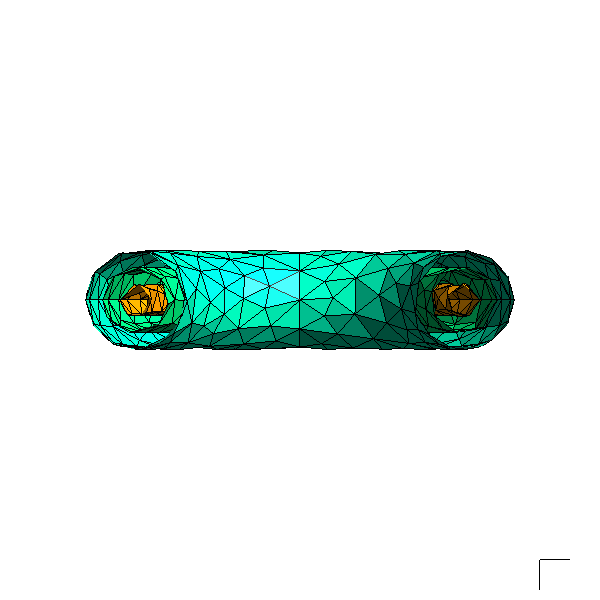

In [8]:
geometry = build_torus_geometry()
meshing_options = sm.GmshSurfaceOptions(min_mesh_size=0.5, max_mesh_size=2)
mesh = sm.SurfaceMesh.from_geometry(geometry, meshing_options)
mesh.render("mesh.png", rotation_xyz=(90, 0, -90), normals=0, clipping=True)
display(Image("mesh.png", width=800))

INFO:stellarmesh.geometry:Importing 2 solids to geometry


Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Circle)
Info    : [ 20%] Meshing curve 2 (Circle)
Info    : [ 40%] Meshing curve 3 (Circle)
Info    : [ 60%] Meshing curve 4 (Circle)
Info    : [ 70%] Meshing curve 5 (Circle)
Info    : [ 90%] Meshing curve 6 (Circle)
Info    : Done meshing 1D (Wall 0.000662315s, CPU 0.000944s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Torus, MeshAdapt)
Info    : [ 40%] Meshing surface 2 (Torus, MeshAdapt)
Info    : [ 70%] Meshing surface 3 (Torus, MeshAdapt)
Info    : Done meshing 2D (Wall 0.69716s, CPU 0.764184s)
Info    : 3225 nodes 6720 elements
Info    : Writing '/tmp/tmpe7kyn99v.msh'...
Info    : Done writing '/tmp/tmpe7kyn99v.msh'
Info    : Reading '/tmp/tmpe7kyn99v.msh'...
Info    : 14 entities
Info    : 3225 nodes
Info    : 6720 elements
Info    : Done reading '/tmp/tmpe7kyn99v.msh'
-------------------------------------------------------
Version       : 4.13.1
License       : GNU General Public License
Build OS      : 

X_ChangeProperty: BadValue (integer parameter out of range for operation) 0x0


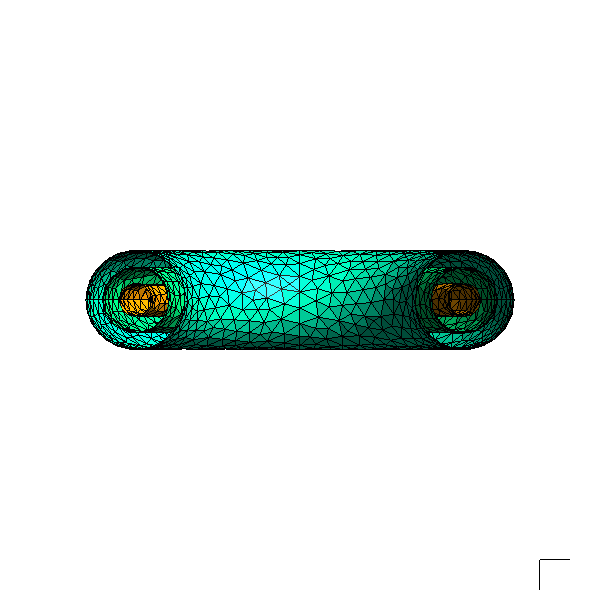

In [9]:
geometry = build_torus_geometry()
meshing_options = sm.GmshSurfaceOptions(min_mesh_size=0.5, max_mesh_size=1)
mesh = sm.SurfaceMesh.from_geometry(geometry, meshing_options)
mesh.render("mesh.png", rotation_xyz=(90, 0, -90), normals=0, clipping=True)

display(Image("mesh.png", width=800))

## Curvature Target

The `curvature_target` option allows us to specify a target number of mesh elements per 2pi radians. Note that regions of higher curvature now have a finer mesh resolution.

INFO:stellarmesh.geometry:Importing 2 solids to geometry


Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Circle)
Info    : [ 20%] Meshing curve 2 (Circle)
Info    : [ 40%] Meshing curve 3 (Circle)
Info    : [ 60%] Meshing curve 4 (Circle)
Info    : [ 70%] Meshing curve 5 (Circle)
Info    : [ 90%] Meshing curve 6 (Circle)
Info    : Done meshing 1D (Wall 0.000632929s, CPU 0.000905s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Torus, MeshAdapt)
Info    : [ 40%] Meshing surface 2 (Torus, MeshAdapt)
Info    : [ 70%] Meshing surface 3 (Torus, MeshAdapt)
Info    : Done meshing 2D (Wall 0.759861s, CPU 0.827071s)
Info    : 2441 nodes 5129 elements
Info    : Writing '/tmp/tmpqthgaaji.msh'...
Info    : Done writing '/tmp/tmpqthgaaji.msh'
Info    : Reading '/tmp/tmpqthgaaji.msh'...
Info    : 14 entities
Info    : 2441 nodes
Info    : 5129 elements
Info    : Done reading '/tmp/tmpqthgaaji.msh'
-------------------------------------------------------
Version       : 4.13.1
License       : GNU General Public License
Build OS      :

X_ChangeProperty: BadValue (integer parameter out of range for operation) 0x0


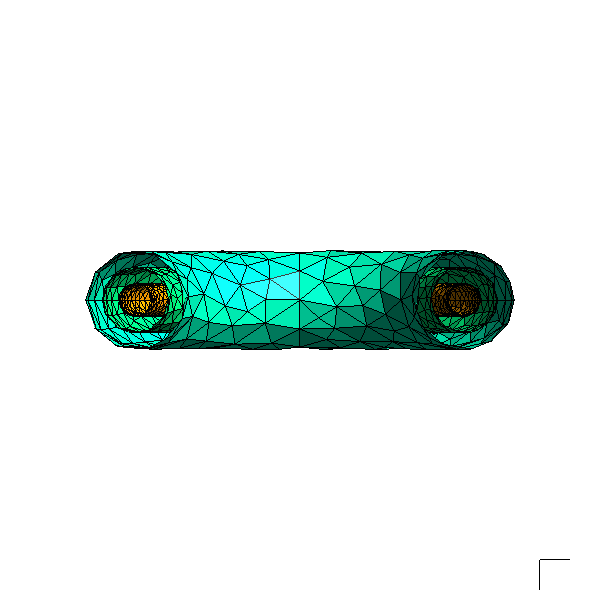

In [10]:
geometry = build_torus_geometry()
meshing_options = sm.GmshSurfaceOptions(curvature_target=10)
mesh = sm.SurfaceMesh.from_geometry(geometry, meshing_options)
mesh.render("mesh.png", rotation_xyz=(90, 0, -90), normals=0, clipping=True)

display(Image("mesh.png", width=800))

# OpenMC Tally Example

In [16]:
from pathlib import Path
import build123d as bd
import stellarmesh as sm
import openmc
import openmc.stats
import tempfile
import numpy as np


with tempfile.TemporaryDirectory() as tmpdirname:
    tmp_path = Path(tmpdirname)
    
    geometry = build_torus_geometry()
    mesh = sm.SurfaceMesh.from_geometry(geometry, sm.OCCSurfaceOptions(tol_angular_deg=0.5))
    dagmc_model = sm.DAGMCModel.from_mesh(mesh)
    dagmc_model.write(tmp_path / "dagmc.h5m")


    mat1 = openmc.Material(name="a")
    mat1.add_nuclide("Fe56", 1)
    mat1.set_density("g/cm3", 1)
    mat2 = openmc.Material(name="b")
    mat2.add_nuclide("Be9", 1)
    mat2.set_density("g/cm3", 1)
    materials = openmc.Materials([mat1, mat2])

    universe = openmc.DAGMCUniverse(tmp_path / "dagmc.h5m").bounded_universe()
    openmc_geometry = openmc.Geometry(universe)

    source = openmc.IndependentSource()
    source.space = openmc.stats.CylindricalIndependent(
        openmc.stats.Discrete([10], [1]),
        openmc.stats.Uniform(0, 2 * np.pi),
        openmc.stats.Discrete([0], [1]),
    )
    source.energy = openmc.stats.Discrete([14e6], [1])

    settings = openmc.Settings()
    settings.batches = 5
    settings.inactive = 0
    settings.particles = 100
    settings.run_mode = "fixed source"
    settings.source = source

    mat_filter = openmc.MaterialFilter(materials)
    tally = openmc.Tally(name="flux")
    tally.filters = [mat_filter]
    tally.scores = ["flux"]
    tallies = openmc.Tallies([tally])

    model = openmc.Model(openmc_geometry, materials, settings, tallies)
    model.export_to_model_xml(path=tmp_path)
    output_file = model.run(cwd = str(tmp_path))
    with openmc.StatePoint(output_file) as sp:
        tally = sp.get_tally(name="flux")
        flux = tally.mean.flatten()
        print("Flux:", flux)

INFO:stellarmesh.geometry:Importing 2 solids to geometry


/home/alex/micromamba/envs/stellarmesh/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=10000.
  warn(msg, IDWarning)
/home/alex/micromamba/envs/stellarmesh/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=10001.
  warn(msg, IDWarning)
/home/alex/micromamba/envs/stellarmesh/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=10002.
  warn(msg, IDWarning)
/home/alex/micromamba/envs/stellarmesh/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=10003.
  warn(msg, IDWarning)
/home/alex/micromamba/envs/stellarmesh/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=10004.
  warn(msg, IDWarning)
/home/alex/micromamba/envs/stellarmesh/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Surface 

1e-07
Info    : Writing '/tmp/tmpg7jxq5mp.msh'...
Info    : Done writing '/tmp/tmpg7jxq5mp.msh'
Info    : Reading '/tmp/tmpg7jxq5mp.msh'...
Info    : 14 entities
Info    : 2187 nodes
Info    : 4056 elements
Info    : Done reading '/tmp/tmpg7jxq5mp.msh'
Info    : Writing '/tmp/tmp2k7pgqdd.stl'...
Info    : Done writing '/tmp/tmp2k7pgqdd.stl'
Info    : Writing '/tmp/tmpksocuhz9.stl'...
Info    : Done writing '/tmp/tmpksocuhz9.stl'
Info    : Writing '/tmp/tmpayrh9ysm.stl'...
Info    : Done writing '/tmp/tmpayrh9ysm.stl'
                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ######